In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from keras.models import Sequential
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('HPG_dropna.csv', index_col = "Date", parse_dates = True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-12-14,2587.906982,2616.661377,2616.661377,2616.661377,2616.661377,2825957.0
2007-12-17,2616.661377,2587.906982,2587.906982,2587.906982,2587.906982,3033217.0
2007-12-18,2587.906982,2659.793213,2659.793213,2659.793213,2659.793213,3622350.0
2007-12-19,2731.679443,2789.188477,2789.188477,2789.188477,2789.188477,7559115.0
2007-12-20,2789.188477,2702.925049,2702.925049,2702.925049,2702.925049,3652588.0
...,...,...,...,...,...,...
2024-05-20,28772.726563,29227.273438,28727.273438,29090.908203,29090.908203,51476809.0
2024-05-21,29090.908203,29090.908203,28590.908203,28954.544922,28954.544922,22972003.0
2024-05-22,28954.544922,29045.455078,28318.181641,28454.544922,28454.544922,44559591.0


In [36]:
data.shape

(4069, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

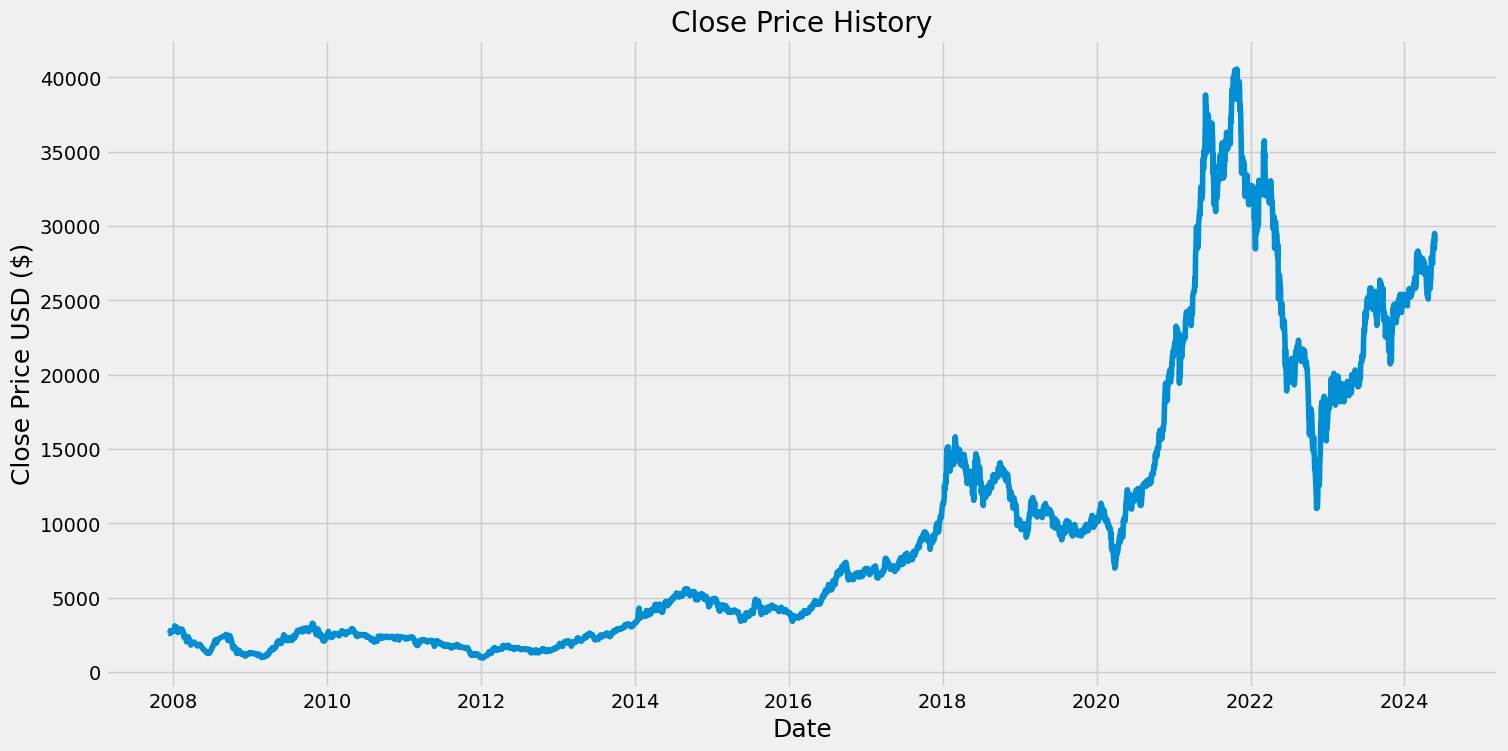

In [40]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show

In [41]:
# Choose variables
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split data for test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Build the model
model = RandomForestRegressor(n_estimators=100, random_state=0)
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 10, 15, 30, 110],
    'max_features': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'min_samples_split': [2, 3, 10],
    'n_estimators': [50, 100, 200, 400]
}

In [43]:
# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9997177274246788


In [44]:
# Use the best parameters to train a new Random Forest model
best_model = RandomForestRegressor(**grid_search.best_params_)
best_model.fit(X_train, y_train)

y_train_pred = best_model.predict(X_train)

y_test_pred = best_model.predict(X_test)

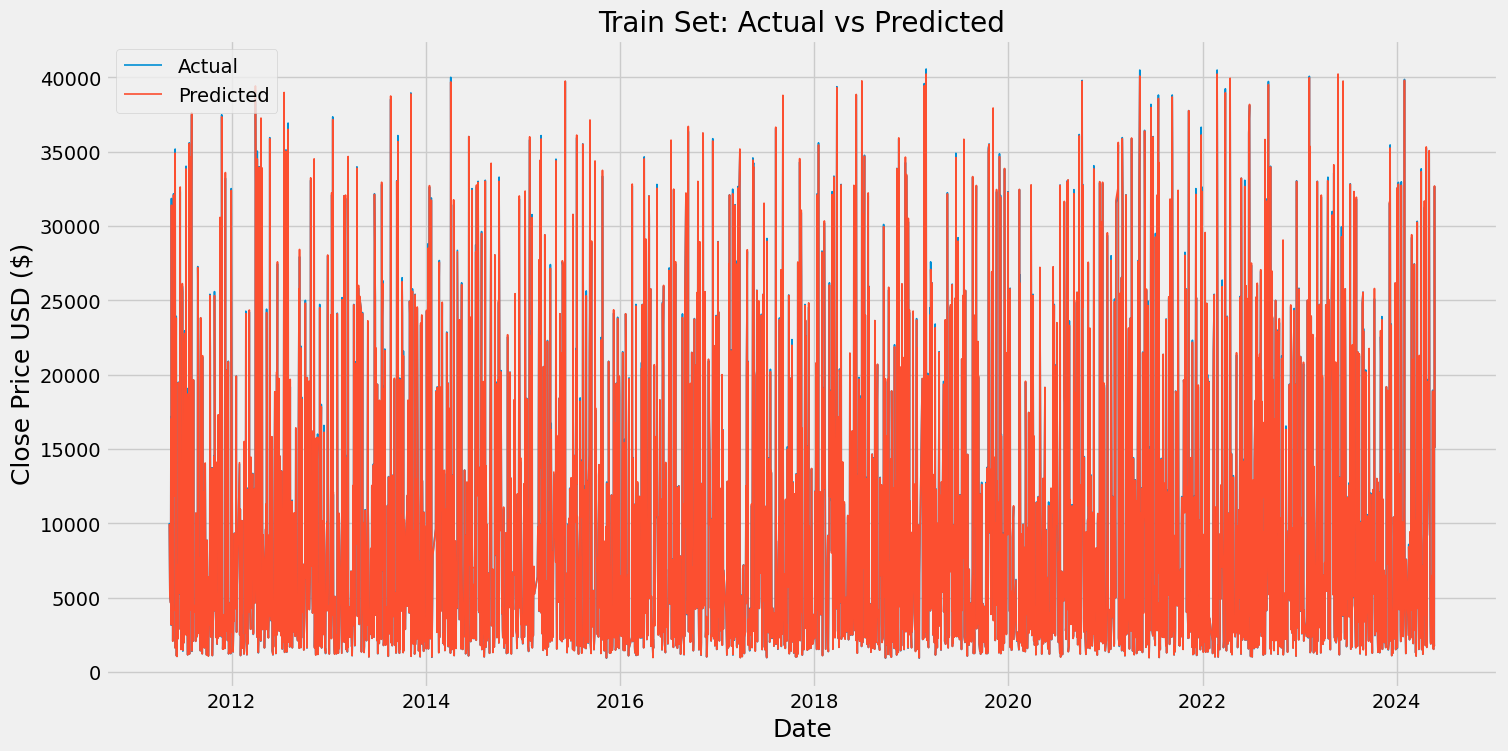

In [45]:
# Plot the train set
plt.figure(figsize=(16,8))
plt.title('Train Set: Actual vs Predicted')
plt.plot(data.index[-len(y_train):], y_train, label='Actual', linewidth=1.2)
plt.plot(data.index[-len(y_train):], y_train_pred, label='Predicted', linewidth=1.2)
plt.legend()
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

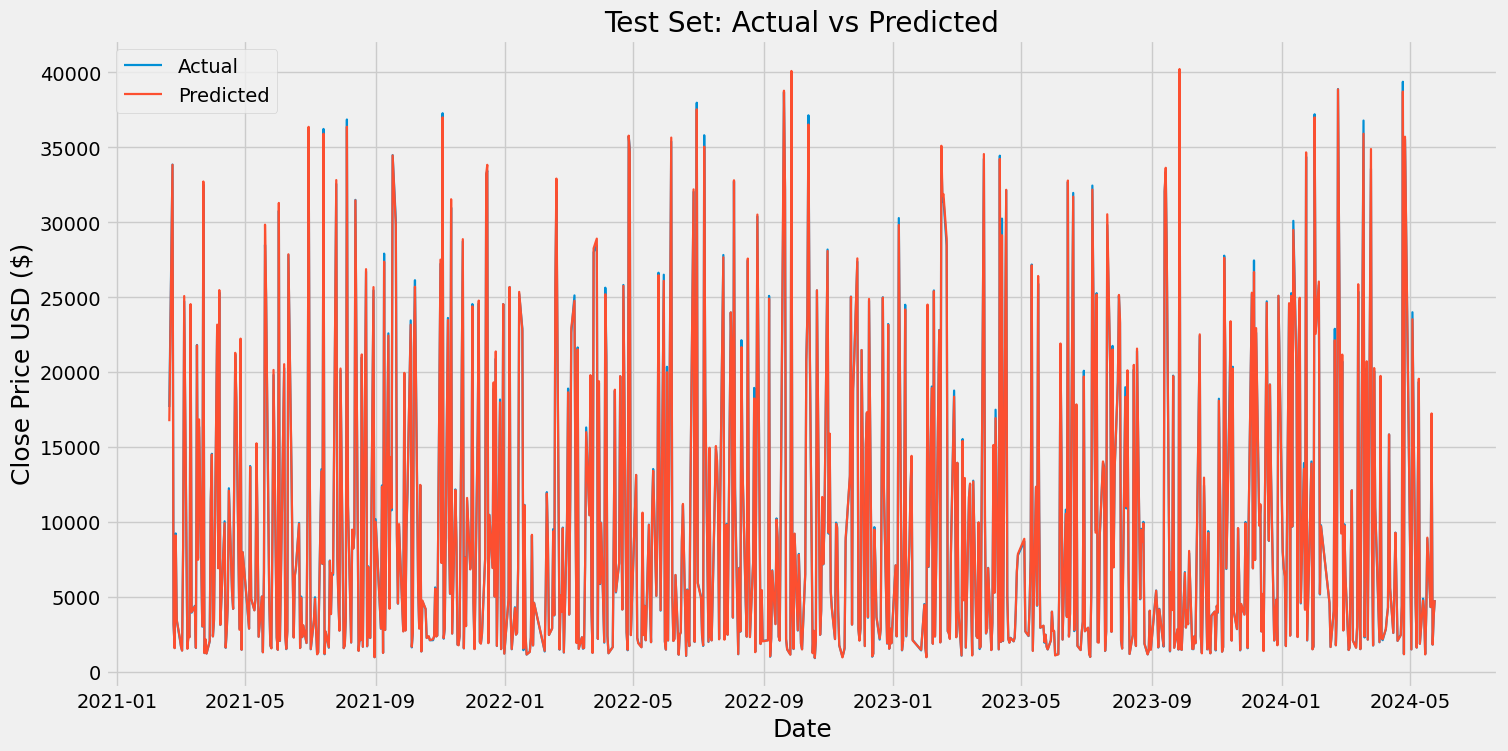

In [46]:
# Plot the test set
plt.figure(figsize=(16,8))
plt.title('Test Set: Actual vs Predicted')
plt.plot(data.index[-len(y_test):], y_test, label='Actual', linewidth = 1.6)
plt.plot(data.index[-len(y_test):], y_test_pred, label='Predicted', linewidth = 1.6)
plt.legend()
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [47]:
# Evaluate the model
print("Root Mean Squared Error for train set", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R2 score for train set:", r2_score(y_train, y_train_pred))

print("Root Mean Squared Error for test set", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R2 score for test set:", r2_score(y_test, y_test_pred))

Root Mean Squared Error for train set 92.11593852667255
R2 score for train set: 0.9999054822910325
Root Mean Squared Error for test set 181.02325325481206
R2 score for test set: 0.9996559104721003
